In [20]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 
import cv2 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
%matplotlib inline

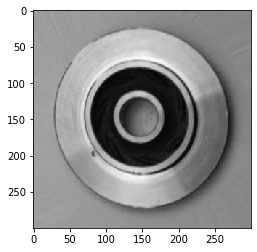

In [2]:
img=image.load_img("casting_data/train/def_front/cast_def_0_0.jpeg")
plt.imshow(img)

In [3]:
cv2.imread("casting_data/train/def_front/cast_def_0_0.jpeg").shape

(300, 300, 3)

In [4]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [5]:
train_dataset=train.flow_from_directory('casting_data/train/',target_size=(200,200),batch_size=3,class_mode='binary')

validation_dataset=validation.flow_from_directory('casting_data/test/',target_size=(200,200),batch_size=3,class_mode='binary')

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'def_front': 0, 'ok_front': 1}

In [9]:
model=tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2,strides=2),

        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2,strides=2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ]
)

In [10]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
model_fir=model.fit(
    train_dataset,
    batch_size=128,
    epochs=10,
    validation_data=validation_dataset
)



Epoch 1/10
2211/2211 [==============================] - 2031s 918ms/step - loss: 0.4273 - accuracy: 0.7927 - val_loss: 0.2183 - val_accuracy: 0.9203
Epoch 2/10
2211/2211 [==============================] - 2086s 944ms/step - loss: 0.1629 - accuracy: 0.9370 - val_loss: 0.1119 - val_accuracy: 0.9552
Epoch 3/10
2211/2211 [==============================] - 1668s 754ms/step - loss: 0.0957 - accuracy: 0.9667 - val_loss: 0.0383 - val_accuracy: 0.9832
Epoch 4/10
2211/2211 [==============================] - 1670s 755ms/step - loss: 0.0641 - accuracy: 0.9757 - val_loss: 0.0260 - val_accuracy: 0.9888
Epoch 5/10
2211/2211 [==============================] - 1639s 741ms/step - loss: 0.0582 - accuracy: 0.9822 - val_loss: 0.0255 - val_accuracy: 0.9916
Epoch 6/10
2211/2211 [==============================] - 1584s 717ms/step - loss: 0.0363 - accuracy: 0.9878 - val_loss: 0.0478 - val_accuracy: 0.9846
Epoch 7/10
2211/2211 [==============================] - 1581s 715ms/step - loss: 0.0347 - accuracy: 0.9888

In [12]:
model.save("defect_model.h5")